<a href="https://colab.research.google.com/github/GVSU-CIS635/gvsu-cis635-term-project-ks/blob/main/CIS_635_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Data Loading and Preliminary Inspection

In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/NIJ2016_JAN01_JUL31.xlsx'
crime_data = pd.read_excel(file_path)

# Preliminary inspection
print("First 5 Rows of the Dataset:")
print(crime_data.head())

print("\nDataset Summary:")
print(crime_data.describe())

print("\nMissing Values in Each Column:")
print(crime_data.isnull().sum())


First 5 Rows of the Dataset:
        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
4  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC   occ_date  x_coordinate  \
0  DISTURBANCE - PRIORITY                        ... 2016-01-01       7624068   
1  DISTURBANCE - PRIORITY                        ... 2016-01-01       7629461   
2  DISTURBANCE - PRIORITY                        ... 2016-01-01       7631377   
3  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   
4  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   

   y_coordinate  census_tract  
0        710192        4200.0  
1        656559        6404.0  
2        667480        6601.0  
3        668402        6702.0  
4        668402        6702.0  

Da

2. Data Cleaning and Outlier Handling

In [6]:
from scipy import stats
import numpy as np

# Drop duplicates
crime_data_cleaned = crime_data.drop_duplicates()

# Handle missing values safely
for column in crime_data_cleaned.columns:
    if crime_data_cleaned[column].dtype == 'object':
        # Fill missing values in categorical columns with mode
        mode_value = crime_data_cleaned[column].mode()[0]
        crime_data_cleaned.loc[crime_data_cleaned[column].isnull(), column] = mode_value
    else:
        # Fill missing values in numerical columns with median
        median_value = crime_data_cleaned[column].median()
        crime_data_cleaned.loc[crime_data_cleaned[column].isnull(), column] = median_value

# Handling outliers for a sample numerical column
z_scores = np.abs(stats.zscore(crime_data_cleaned['x_coordinate']))
crime_data_cleaned = crime_data_cleaned[(z_scores < 3)]

print("Data after Cleaning:")
print(crime_data_cleaned.head())




Data after Cleaning:
        CATEGORY CALL GROUPS final_case_type  \
0  STREET CRIMES    DISORDER          DISTP    
1  STREET CRIMES    DISORDER          DISTP    
2  STREET CRIMES    DISORDER          DISTP    
3  STREET CRIMES    DISORDER          DISTP    
5  STREET CRIMES    DISORDER          DISTP    

                                           CASE DESC   occ_date  x_coordinate  \
0  DISTURBANCE - PRIORITY                        ... 2016-01-01       7624068   
1  DISTURBANCE - PRIORITY                        ... 2016-01-01       7629461   
2  DISTURBANCE - PRIORITY                        ... 2016-01-01       7631377   
3  DISTURBANCE - PRIORITY                        ... 2016-01-01       7637471   
5  DISTURBANCE - PRIORITY                        ... 2016-01-01       7638508   

   y_coordinate  census_tract  
0        710192        4200.0  
1        656559        6404.0  
2        667480        6601.0  
3        668402        6702.0  
5        663772        6602.0  


3. Feature Engineering and Visualization

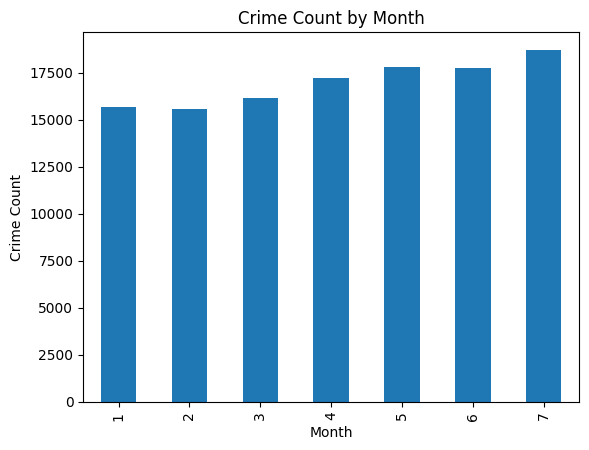

<ipython-input-7-10a489df2280>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(crime_data_cleaned.corr(), annot=True, cmap='coolwarm')


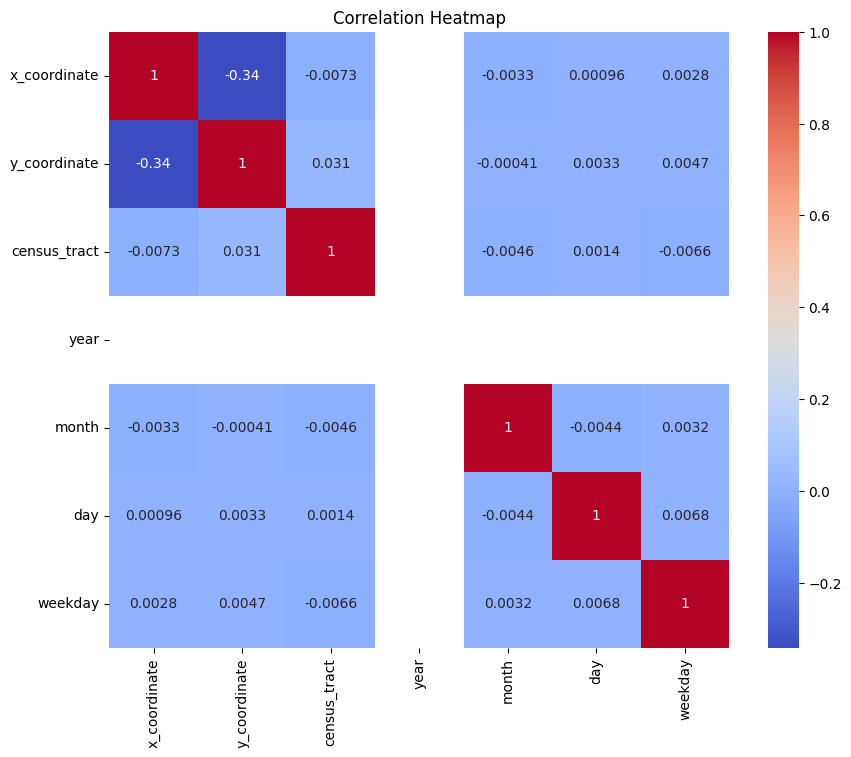

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering: Extracting date features
crime_data_cleaned['year'] = crime_data_cleaned['occ_date'].dt.year
crime_data_cleaned['month'] = crime_data_cleaned['occ_date'].dt.month
crime_data_cleaned['day'] = crime_data_cleaned['occ_date'].dt.day
crime_data_cleaned['weekday'] = crime_data_cleaned['occ_date'].dt.weekday

# Visualization: Crime Count by Month
crime_data_cleaned['month'].value_counts().sort_index().plot(kind='bar')
plt.title('Crime Count by Month')
plt.xlabel('Month')
plt.ylabel('Crime Count')
plt.show()

# Visualization: Heatmap of Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(crime_data_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()
